In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
px.set_mapbox_access_token(open("./mapbox_token").read())
# pip install plotly_express==0.4.0

from warnings import filterwarnings
filterwarnings('ignore')

from datetime import datetime 

# Data Source
# https://www.kaggle.com/kimjihoo/coronavirusdataset?select=SeoulFloating.csv

from sklearn.model_selection import train_test_split

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Diagram
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image

https://stackoverflow.com/questions/49647705/jupyter-nbextensions-does-not-appear/50663099#:~:text=First%2C%20follow%20this%20SO%2Dpost,and%20should%20see%20the%20crosshair.

Enable Table Of Content

pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
jupyter nbextension enable spellchecker/main
jupyter nbextension enable codefolding/main

# Exploratory Data Analysis

# Case

## Overview of the cases in Korea

In [3]:
caseData = pd.read_csv('covid/case.csv')
caseDataForMap = caseData.copy()
caseDataForMap = caseDataForMap[caseDataForMap[['latitude', 'longitude']] != '-']

cols = ['latitude', 'longitude']
caseData[cols] = caseData[cols].apply(pd.to_numeric, errors='coerce', axis=1)
display(caseData.head())

fig = px.scatter_mapbox(
    caseData[caseData.latitude != '-'], 
    text="<br>City: " + caseData["city"] +" <br>Province: " + caseData["province"],
    lat="latitude", 
    lon="longitude",     
    color="confirmed", 
    size="confirmed",
    color_continuous_scale=px.colors.diverging.Spectral,
    size_max=100, 
    zoom=6,
    title="Overview of the cases in Korea")
fig.show()

case_id province          city  group               infection_case  \
0   1000001    Seoul    Yongsan-gu   True                Itaewon Clubs   
1   1000002    Seoul     Gwanak-gu   True                      Richway   
2   1000003    Seoul       Guro-gu   True          Guro-gu Call Center   
3   1000004    Seoul  Yangcheon-gu   True  Yangcheon Table Tennis Club   
4   1000005    Seoul     Dobong-gu   True              Day Care Center   

   confirmed   latitude   longitude  
0        139  37.538621  126.992652  
1        119  37.482080  126.901384  
2         95  37.508163  126.884387  
3         43  37.546061  126.874209  
4         43  37.679422  127.044374

## Check the relationship between group and solo cases

65.48850574712644

case_id province          city  group               infection_case  \
0   1000001    Seoul    Yongsan-gu   True                Itaewon Clubs   
1   1000002    Seoul     Gwanak-gu   True                      Richway   
2   1000003    Seoul       Guro-gu   True          Guro-gu Call Center   
3   1000004    Seoul  Yangcheon-gu   True  Yangcheon Table Tennis Club   
4   1000005    Seoul     Dobong-gu   True              Day Care Center   

   confirmed   latitude   longitude  
0        139  37.538621  126.992652  
1        119  37.482080  126.901384  
2         95  37.508163  126.884387  
3         43  37.546061  126.874209  
4         43  37.679422  127.044374

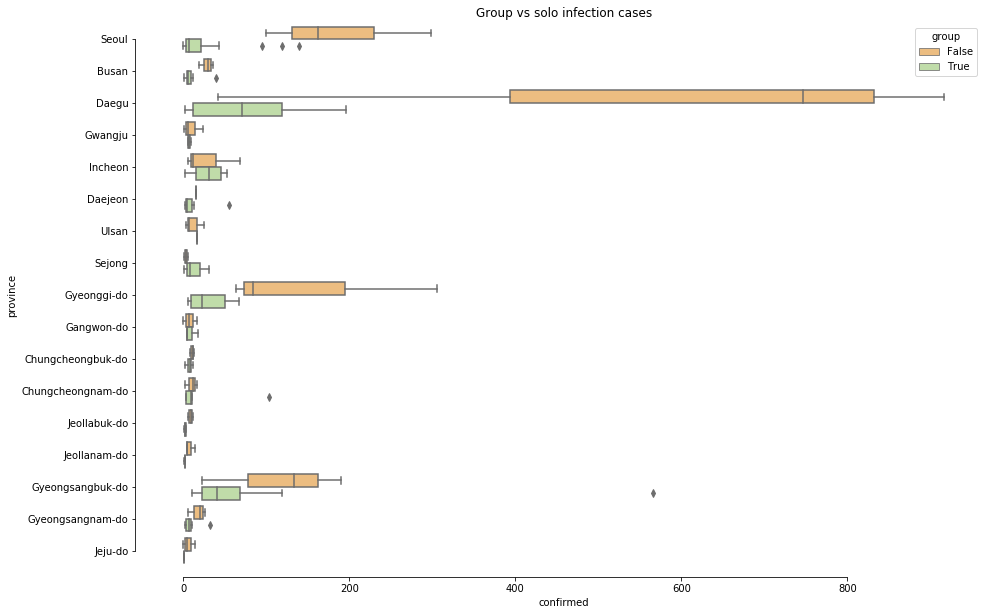

In [4]:
caseDataCopy = caseData.copy()
display(caseDataCopy['confirmed'].mean())

#Remove confirmed cases which are more than 1000
#We only want to find out if the cases are group or individual

caseDataCopy = caseDataCopy[caseDataCopy['confirmed'] < 1000] 
display(caseDataCopy.head())

f, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(x="confirmed", y="province",
            hue="group", palette="Spectral",
            data=caseDataCopy, ax=ax).set_title('Group vs solo infection cases')
sns.despine(offset=10, trim=True)

## Source of infected cases sort by source and province

infection_case     Anyang Gunpo Pastors Group  \
province                                        
Busan                                     NaN   
Chungcheongbuk-do                         NaN   
Chungcheongnam-do                         NaN   
Daegu                                     NaN   
Daejeon                                   NaN   

infection_case     Biblical Language study meeting  \
province                                             
Busan                                          NaN   
Chungcheongbuk-do                              NaN   
Chungcheongnam-do                              NaN   
Daegu                                          NaN   
Daejeon                                        NaN   

infection_case     Bonghwa Pureun Nursing Home  Bundang Jesaeng Hospital  \
province                                                                   
Busan                                      NaN                       NaN   
Chungcheongbuk-do                          NaN                       NaN   
Chungcheongnam-do                          NaN                       NaN   
Daegu                                      NaN                       NaN   
Daejeon                                    NaN                       NaN   

infection_case     Changnyeong Coin Karaoke  Cheongdo Daenam Hospital  \
province                                                                
Busan                                   NaN                       1.0   
Chungcheongbuk-do                       NaN                       NaN   
Chungcheongnam-do                       NaN                       NaN   
Daegu                                   NaN                       2.0   
Daejeon                                 NaN                       NaN   

infection_case     Coupang Logistics Center  Daejeon door-to-door sales  \
province                                                                  
Busan                                   NaN                         NaN   
Chungcheongbuk-do                       NaN                         NaN   
Chungcheongnam-do                       NaN                         NaN   
Daegu                                   NaN                         NaN   
Daejeon                                 NaN                         NaN   

infection_case     Daesil Convalescent Hospital  Daezayeon Korea  ...  \
province                                                          ...   
Busan                                       NaN              NaN  ...   
Chungcheongbuk-do                           NaN              NaN  ...   
Chungcheongnam-do                           NaN              NaN  ...   
Daegu                                     101.0              NaN  ...   
Daejeon                                     NaN              NaN  ...   

infection_case     Yangcheon Table Tennis Club  Yechun-gun  \
province                                                     
Busan                                      NaN         NaN   
Chungcheongbuk-do                          NaN         NaN   
Chungcheongnam-do                          NaN         NaN   
Daegu                                      NaN         NaN   
Daejeon                                    NaN         NaN   

infection_case     Yeonana News Class  Yeongdeungpo Learning Institute  \
province                                                                 
Busan                             NaN                              NaN   
Chungcheongbuk-do                 NaN                              NaN   
Chungcheongnam-do                 NaN                              NaN   
Daegu                             NaN                              NaN   
Daejeon                           NaN                              NaN   

infection_case     Yongin Brothers  contact with patient    etc  \
province                                                          
Busan                          NaN                  19.0   30.0   
Chungcheongbuk-do              NaN     

Text(0.5, 1, 'Numbers of cases sort by source and province')

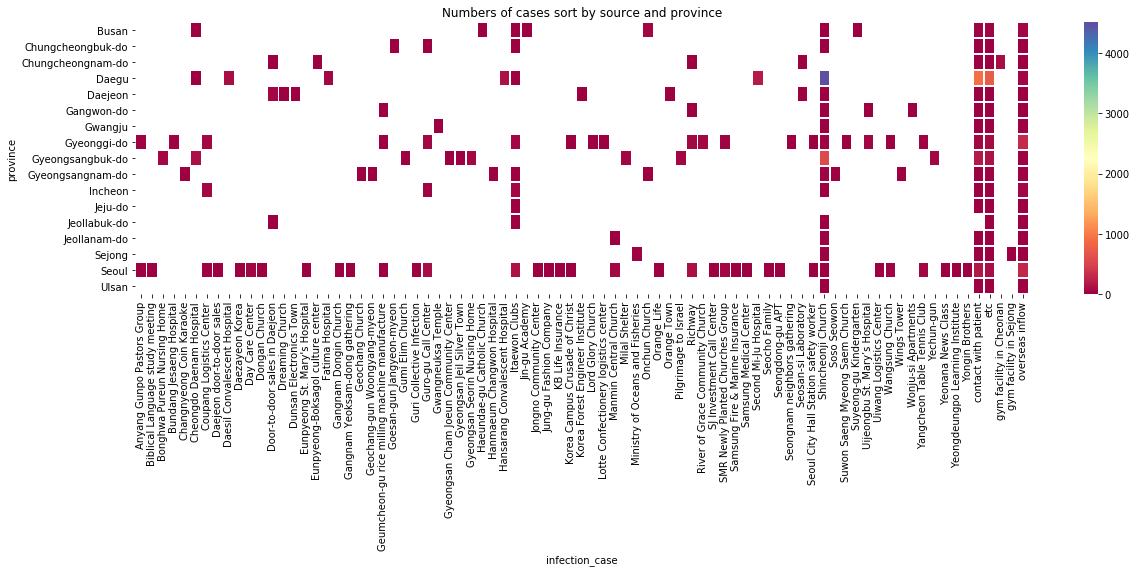

In [5]:
locations = caseData.pivot("province", "infection_case", "confirmed")
display(locations.head())

f, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(locations, cmap="Spectral", annot=False, fmt="d", linewidths=.5, ax=ax).set_title('Numbers of cases sort by source and province')

# Patient Info

## Numbers Of Cases Per Day

In [6]:
patientData = pd.read_csv('covid/patientinfo.csv')
display(patientData.head())

groupPatientData = patientData.groupby('confirmed_date').size().reset_index()
groupPatientData.columns = ['confirmed_date', 'count']

fig = px.line(groupPatientData, x="confirmed_date", y="count", title='Numbers Of Covid Cases Per Day')
fig.show()

patient_id     sex  age country province         city  \
0  1000000001    male  50s   Korea    Seoul   Gangseo-gu   
1  1000000002    male  30s   Korea    Seoul  Jungnang-gu   
2  1000000003    male  50s   Korea    Seoul    Jongno-gu   
3  1000000004    male  20s   Korea    Seoul      Mapo-gu   
4  1000000005  female  20s   Korea    Seoul  Seongbuk-gu   

         infection_case infected_by contact_number symptom_onset_date  \
0       overseas inflow         NaN             75         2020-01-22   
1       overseas inflow         NaN             31                NaN   
2  contact with patient  2002000001             17                NaN   
3       overseas inflow         NaN              9         2020-01-26   
4  contact with patient  1000000002              2                NaN   

  confirmed_date released_date deceased_date     state  
0     2020-01-23    2020-02-05           NaN  released  
1     2020-01-30    2020-03-02           NaN  released  
2     2020-01-30    2020-02-19           NaN  released  
3     2020-01-30    2020-02-15           NaN  released  
4     2020-01-31    2020-02-24           NaN  released

## Average Survivor Treatment Day (Recovery Speed), By Age and Gender

age            0s    10s        20s        30s        40s        50s  \
sex                                                                    
female  28.375000  19.80  23.659091  23.415094  22.025806  23.310345   
male    21.727273  21.45  23.275132  22.971429  26.581395  24.666667   

age           60s        70s        80s        90s  
sex                                                 
female  26.543689  31.344828  33.738095  28.461538  
male    27.257143  36.200000  37.055556  33.000000

Text(0.5, 1, 'Average Survivor Treatment Day, Sort by Age & Gender')

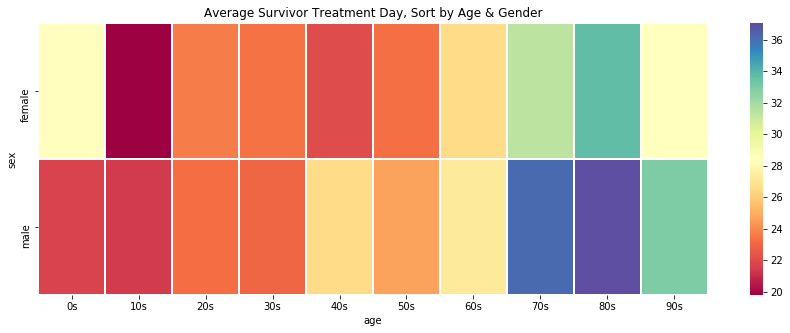

In [7]:
confinedDaysAnalysis = patientData.copy()
confinedDaysAnalysis = confinedDaysAnalysis[confinedDaysAnalysis['age'] != '100s'] #Just a single data which is highly skewed
confinedDaysAnalysis = confinedDaysAnalysis[confinedDaysAnalysis['released_date'].notnull()]

cols = ['released_date', 'confirmed_date']
confinedDaysAnalysis[cols] = confinedDaysAnalysis[cols].apply(pd.to_datetime, errors='coerce', axis=1)
confinedDaysAnalysis['Total Treatment Days'] = (confinedDaysAnalysis['released_date'] - confinedDaysAnalysis['confirmed_date']).dt.days

groupedData = confinedDaysAnalysis.groupby(['sex', 'age'])['Total Treatment Days'].mean().unstack().stack().reset_index()
groupedData.columns = ["sex", "age", "Average Treatment Days"]

dataForHeatmap = groupedData.pivot("sex", "age", "Average Treatment Days")
display(dataForHeatmap.head())
f, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(dataForHeatmap, cmap="Spectral", annot=False, fmt="d", linewidths=.5, ax=ax).set_title('Average Survivor Treatment Day, Sort by Age & Gender')

In [8]:
confinedDaysAnalysis['age'] = confinedDaysAnalysis['age'].dropna()
age = {'0s':0, '10s':1, '20s':2, '30s':3, '40s':4, '50s':5, '60s':6, '70s':7, '80s':8, '90s':9}
confinedDaysAnalysis['age'] = confinedDaysAnalysis['age'].map(age)
confinedDaysAnalysis = confinedDaysAnalysis[confinedDaysAnalysis['age'].notna()]

fig = px.scatter(confinedDaysAnalysis, x="age", y="Total Treatment Days", color="sex", trendline="ols", title="Does age group affect total treatment days?")
fig.show()



## Average Survivor Treatment Day (Recovery Speed) By City & Age

age                 0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0
province                                                                     
Chungcheongbuk-do  49.0  20.0  24.0  23.0  23.0  25.0  23.0  26.0  26.0  20.0
Chungcheongnam-do  17.0  23.0  23.0  26.0  24.0  27.0  27.0  43.0   9.0   NaN
Daegu               NaN   NaN   NaN   NaN   NaN   9.0   7.0  12.0   NaN   NaN
Daejeon             NaN  15.0  22.0  23.0  18.0  26.0  40.0  24.0  17.0   NaN
Gangwon-do          NaN   NaN  12.0  24.0  27.0  19.0  25.0   NaN   NaN   NaN

Text(0.5, 1, 'Average Survivor Treatment Day, Sort by City & Age')

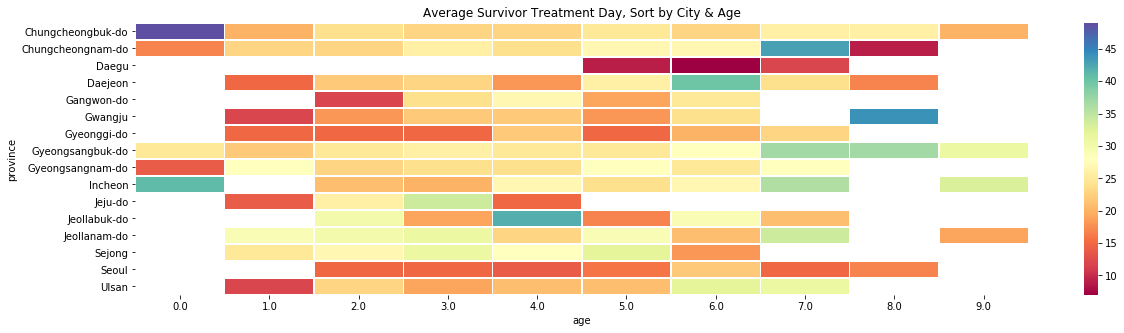

In [9]:
groupedData = confinedDaysAnalysis.groupby(['province', 'age'])['Total Treatment Days'].mean().unstack().stack().reset_index()
groupedData.columns = ["province", "age", "Average Treatment Days"]
groupedData['Average Treatment Days'] = np.ceil(groupedData['Average Treatment Days'].apply(pd.to_numeric, errors='coerce'))

dataForHeatmap = groupedData.pivot("province", "age", "Average Treatment Days")
display(dataForHeatmap.head())
f, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(dataForHeatmap, cmap="Spectral", annot=False, fmt="d", linewidths=.5, ax=ax).set_title('Average Survivor Treatment Day, Sort by City & Age')

## Average Deceased Treatment Day (Fatality Speed) By Gender and Age

patient_id     sex  age country province    city      infection_case  \
1468  1200000038  female  50s   Korea    Daegu  Nam-gu                 NaN   
1507  1200000114    male  70s   Korea    Daegu     NaN  Shincheonji Church   
1508  1200000620    male  70s   Korea    Daegu     NaN                 NaN   
1509  1200000901  female  80s   Korea    Daegu     NaN                 NaN   
1510  1200001064  female  70s   Korea    Daegu     NaN                 NaN   

     infected_by contact_number symptom_onset_date confirmed_date  \
1468         NaN            NaN                NaN     2020-02-18   
1507         NaN            NaN                NaN     2020-02-21   
1508         NaN            NaN                NaN     2020-02-24   
1509         NaN            NaN                NaN     2020-02-25   
1510         NaN            NaN                NaN     2020-02-26   

     released_date deceased_date     state  Total Treatment Days  
1468           NaN    2020-02-23  deceased                     5  
1507           NaN    2020-02-26  deceased                     5  
1508           NaN    2020-03-02  deceased                     7  
1509           NaN    2020-03-04  deceased                     8  
1510           NaN    2020-03-01  deceased                     4

age     30s       50s   60s   70s        80s   90s
sex                                               
female  NaN  1.333333   8.0  27.0  11.615385  10.0
male    0.0  8.000000  10.9   5.5  10.666667  10.5

Text(0.5, 1, 'Average Deceased Treatment Day, Sort by Age & Gender')

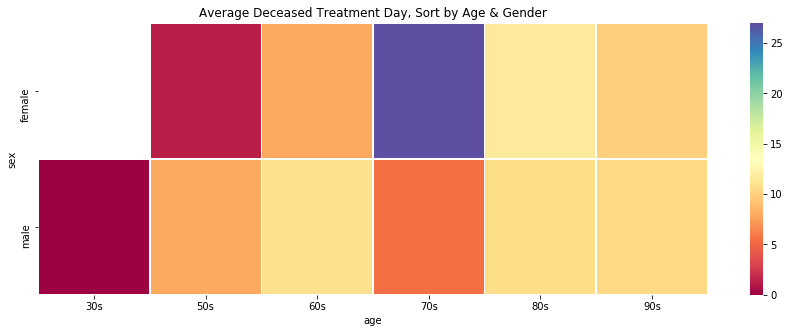

In [10]:
confinedDaysAnalysis = patientData.copy()
confinedDaysAnalysis = confinedDaysAnalysis[confinedDaysAnalysis['age'] != '100s'] #Just a single data which is highly skewed
confinedDaysAnalysis = confinedDaysAnalysis[confinedDaysAnalysis['deceased_date'].notnull()]

cols = ['deceased_date', 'confirmed_date']
confinedDaysAnalysis[cols] = confinedDaysAnalysis[cols].apply(pd.to_datetime, errors='coerce', axis=1)
confinedDaysAnalysis['Total Treatment Days'] = (confinedDaysAnalysis['deceased_date'] - confinedDaysAnalysis['confirmed_date']).dt.days
display(confinedDaysAnalysis.head())

groupedData = confinedDaysAnalysis.groupby(['sex', 'age'])['Total Treatment Days'].mean().unstack().stack().reset_index()
groupedData.columns = ["sex", "age", "Average Treatment Days"]

dataForHeatmap = groupedData.pivot("sex", "age", "Average Treatment Days")
display(dataForHeatmap.head())
f, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(dataForHeatmap, cmap="Spectral", annot=False, fmt="d", linewidths=.5, ax=ax).set_title('Average Deceased Treatment Day, Sort by Age & Gender')

## Average Deceased Treatment Day (Fatality Speed) By City and Age

age               30s  50s   60s   70s   80s   90s
province                                          
Daegu             NaN  3.0   6.0   4.0   5.0   6.0
Daejeon           NaN  NaN   NaN  52.0   NaN   NaN
Gangwon-do        NaN  NaN   NaN  15.0  24.0   NaN
Gyeonggi-do       0.0  NaN   NaN   NaN   NaN   NaN
Gyeongsangbuk-do  NaN  7.0  11.0  17.0  13.0  12.0

Text(0.5, 1, 'Average Deceased Treatment Day, Sort by City & Age')

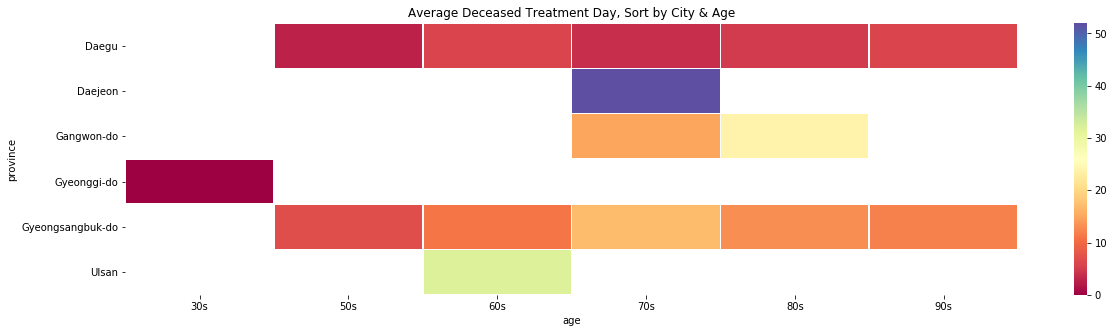

In [11]:
groupedData = confinedDaysAnalysis.groupby(['province', 'age'])['Total Treatment Days'].mean().unstack().stack().reset_index()
groupedData.columns = ["province", "age", "Average Treatment Days"]
groupedData['Average Treatment Days'] = np.ceil(groupedData['Average Treatment Days'].apply(pd.to_numeric, errors='coerce'))

dataForHeatmap = groupedData.pivot("province", "age", "Average Treatment Days")
display(dataForHeatmap.head())
f, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(dataForHeatmap, cmap="Spectral", annot=False, fmt="d", linewidths=.5, ax=ax).set_title('Average Deceased Treatment Day, Sort by City & Age')

## Number of Infection, Survivor, Deceased Per City by percentage

In [12]:
survivorCountAnalysis = patientData.copy()

survivorCountAnalysis['survive'] = survivorCountAnalysis['released_date'].notnull()
survivorCountAnalysis['deceased'] = survivorCountAnalysis['deceased_date'].notnull()
survivorCountAnalysis['under treatment'] = survivorCountAnalysis['deceased_date'].isnull() & survivorCountAnalysis['released_date'].isnull()

provinceStats = survivorCountAnalysis.groupby(['province']).sum()
provinceStatsClean = provinceStats[['survive', 'deceased', 'under treatment']]

provinceStatsClean['survive %'] = np.round(provinceStatsClean['survive'] / (provinceStatsClean['survive'] + provinceStatsClean['deceased'] + provinceStatsClean['under treatment']) * 100, 2)
provinceStatsClean['deceased %'] = np.round(provinceStatsClean['deceased'] / (provinceStatsClean['survive'] + provinceStatsClean['deceased'] + provinceStatsClean['under treatment']) * 100, 2)
provinceStatsClean['under treatment %'] = np.round(provinceStatsClean['under treatment'] / (provinceStatsClean['survive'] + provinceStatsClean['deceased'] + provinceStatsClean['under treatment']) * 100, 2)

provinceStatsAbsolute = provinceStatsClean[['survive', 'deceased', 'under treatment']]
provinceStatsPercentage = provinceStatsClean[['survive %', 'deceased %', 'under treatment %']]

display(provinceStatsAbsolute.head())
display(provinceStatsPercentage.head())

survive  deceased  under treatment
province                                             
Busan                  0.0       0.0            151.0
Chungcheongbuk-do     50.0       0.0              6.0
Chungcheongnam-do    150.0       0.0             18.0
Daegu                  4.0      20.0            113.0
Daejeon               44.0       1.0             74.0

survive %  deceased %  under treatment %
province                                                   
Busan                   0.00        0.00             100.00
Chungcheongbuk-do      89.29        0.00              10.71
Chungcheongnam-do      89.29        0.00              10.71
Daegu                   2.92       14.60              82.48
Daejeon                36.97        0.84              62.18

province  survive %  deceased %  under treatment %
0              Busan       0.00        0.00             100.00
1  Chungcheongbuk-do      89.29        0.00              10.71
2  Chungcheongnam-do      89.29        0.00              10.71
3              Daegu       2.92       14.60              82.48
4            Daejeon      36.97        0.84              62.18

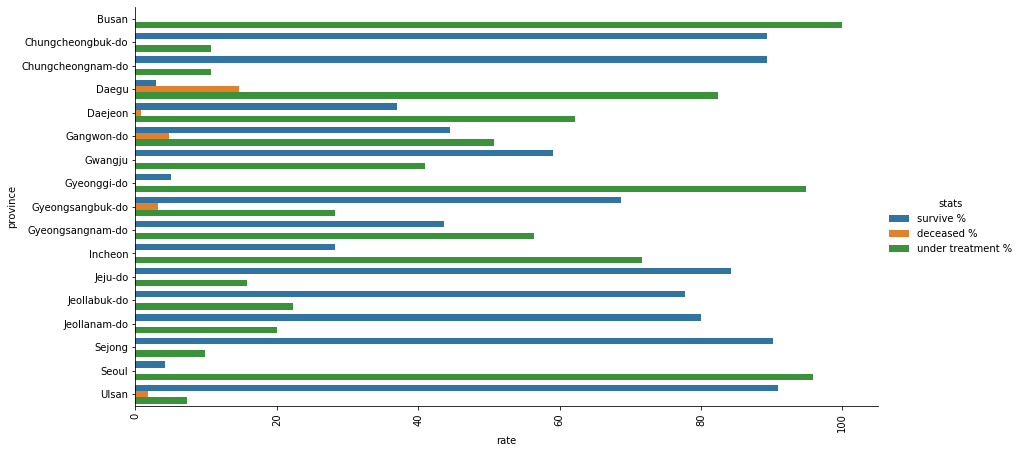

In [13]:
newTable = provinceStatsPercentage.reset_index()
display(newTable.head())
newTable = pd.melt(newTable, id_vars="province", var_name="stats", value_name="rate")

chart = sns.factorplot(x='rate', y='province', hue='stats', data=newTable, kind='bar', height=6.27, aspect=16.7/8.27)
chart.set_xticklabels(rotation=90)

## Number of Infection, Survivor, Deceased Sort By Gender

In [14]:
survivorCountAnalysis = patientData.copy()

survivorCountAnalysis['survive'] = survivorCountAnalysis['released_date'].notnull()
survivorCountAnalysis['deceased'] = survivorCountAnalysis['deceased_date'].notnull()
survivorCountAnalysis['under treatment'] = survivorCountAnalysis['deceased_date'].isnull() & survivorCountAnalysis['released_date'].isnull()

provinceStats = survivorCountAnalysis.groupby(['sex']).sum()
provinceStatsClean = provinceStats[['survive', 'deceased', 'under treatment']]

provinceStatsClean['survive %'] = np.round(provinceStatsClean['survive'] / (provinceStatsClean['survive'] + provinceStatsClean['deceased'] + provinceStatsClean['under treatment']) * 100, 2)
provinceStatsClean['deceased %'] = np.round(provinceStatsClean['deceased'] / (provinceStatsClean['survive'] + provinceStatsClean['deceased'] + provinceStatsClean['under treatment']) * 100, 2)
provinceStatsClean['under treatment %'] = np.round(provinceStatsClean['under treatment'] / (provinceStatsClean['survive'] + provinceStatsClean['deceased'] + provinceStatsClean['under treatment']) * 100, 2)

provinceStatsAbsolute = provinceStatsClean[['survive', 'deceased', 'under treatment']]
provinceStatsPercentage = provinceStatsClean[['survive %', 'deceased %', 'under treatment %']]

display(provinceStatsAbsolute)
display(provinceStatsPercentage)

survive  deceased  under treatment
sex                                       
female    909.0      26.0           1285.0
male      677.0      40.0           1108.0

survive %  deceased %  under treatment %
sex                                             
female      40.95        1.17              57.88
male        37.10        2.19              60.71

sex              stats   rate
0  female          survive %  40.95
1    male          survive %  37.10
2  female         deceased %   1.17
3    male         deceased %   2.19
4  female  under treatment %  57.88

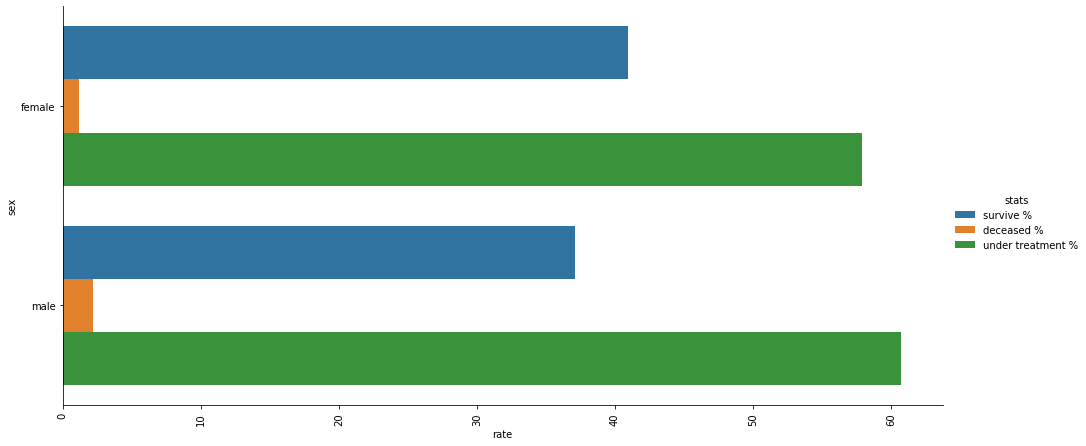

In [15]:
newTable = provinceStatsPercentage.reset_index()
newTable = pd.melt(newTable, id_vars="sex", var_name="stats", value_name="rate")
display(newTable.head())

chart = sns.factorplot(x='rate', y='sex', hue='stats', data=newTable, kind='bar', height=6.27, aspect=17.7/8.27)
chart.set_xticklabels(rotation=90)

## Network Diagram

In [16]:
networkData = patientData.copy()
networkData = networkData[networkData['infected_by'].notnull()]
networkData = networkData[['patient_id','sex','age','province','city','infection_case','infected_by','state']]
display(networkData.head())

patient_id     sex  age province         city        infection_case  \
2  1000000003    male  50s    Seoul    Jongno-gu  contact with patient   
4  1000000005  female  20s    Seoul  Seongbuk-gu  contact with patient   
5  1000000006  female  50s    Seoul    Jongno-gu  contact with patient   
6  1000000007    male  20s    Seoul    Jongno-gu  contact with patient   
9  1000000010  female  60s    Seoul  Seongbuk-gu  contact with patient   

  infected_by     state  
2  2002000001  released  
4  1000000002  released  
5  1000000003  released  
6  1000000003  released  
9  1000000003  released

In [17]:
A = list(networkData["infected_by"].unique())
B = list(networkData["patient_id"].unique())
node_list = set(A+B)

# Create Graph
G = nx.Graph()

for i in node_list:
    G.add_node(i)
# G.nodes()

for i,j in networkData.iterrows():
    G.add_edges_from([(j["infected_by"],j["patient_id"])])
    
pos = nx.spring_layout(G, k=0.5, iterations=50)

for n, p in pos.items():
    G.nodes[n]['pos'] = p

edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='RdBu',
        reversescale=True,
        color=[],
        size=15,
        colorbar=dict(
            thickness=10,
            title='Numnber of Infected Cases',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))

for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = str(adjacencies[0]) +' # of connections: '+ str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])
    
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Korea Covid Network Connections',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="",
                    showarrow=False,
                    xref="paper", yref="paper") ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

iplot(fig)

# Policy

In [18]:
policyData = pd.read_csv('covid/policy.csv')
policyDataCopy = policyData.copy()
policyDataCopy['end_date'] = policyDataCopy['end_date'].fillna(datetime.now().strftime('%Y-%m-%d'))
display(policyDataCopy.head())

df = []

for index, row in policyDataCopy.iterrows():
    df.append(dict(Task=row['gov_policy'], Start=row['start_date'], Finish=row['end_date'], Resource=row['type']))

fig = px.timeline(df, x_start="Start", x_end="Finish", y="Task", color="Resource", title="Policy over time")
fig.show()

patientData = pd.read_csv('covid/patientinfo.csv')
groupPatientData = patientData.groupby('confirmed_date').size().reset_index()
groupPatientData.columns = ['confirmed_date', 'count']

fig = px.line(groupPatientData, x="confirmed_date", y="count", title='Numbers Of Covid Cases Per Day')
fig.show()

policy_id country         type                      gov_policy  \
0          1   Korea        Alert  Infectious Disease Alert Level   
1          2   Korea        Alert  Infectious Disease Alert Level   
2          3   Korea        Alert  Infectious Disease Alert Level   
3          4   Korea        Alert  Infectious Disease Alert Level   
4          5   Korea  Immigration   Special Immigration Procedure   

             detail  start_date    end_date  
0    Level 1 (Blue)  2020-01-03  2020-01-19  
1  Level 2 (Yellow)  2020-01-20  2020-01-27  
2  Level 3 (Orange)  2020-01-28  2020-02-22  
3     Level 4 (Red)  2020-02-23  2020-09-11  
4        from China  2020-02-04  2020-09-11

# Time

In [19]:
timeData = pd.read_csv('covid/time.csv')
timeDataMelted = pd.melt(timeData, id_vars=['date'], value_vars=['test', 'negative','confirmed','released','deceased'])
display(timeDataMelted.head())

fig = px.line(timeDataMelted, x="date", y="value", color='variable', title="Overall cases over time")
fig.show()

date variable  value
0  2020-01-20     test      1
1  2020-01-21     test      1
2  2020-01-22     test      4
3  2020-01-23     test     22
4  2020-01-24     test     27

In [20]:
timeDataMelted = pd.melt(timeData, id_vars=['date'], value_vars=['confirmed','released','deceased'])
display(timeDataMelted.head())

fig = px.line(timeDataMelted, x="date", y="value", color='variable', title="Confirmed, released & deceased over time")
fig.show()

date   variable  value
0  2020-01-20  confirmed      1
1  2020-01-21  confirmed      1
2  2020-01-22  confirmed      1
3  2020-01-23  confirmed      1
4  2020-01-24  confirmed      2

# TimeAge

In [21]:
timeAgeData = pd.read_csv('covid/timeage.csv')
display(timeAgeData.head())

fig = px.line(timeAgeData, x="date", y="confirmed", color='age', title="Confirmed cases of various age group over time")
fig.show()

date  time  age  confirmed  deceased
0  2020-03-02     0   0s         32         0
1  2020-03-02     0  10s        169         0
2  2020-03-02     0  20s       1235         0
3  2020-03-02     0  30s        506         1
4  2020-03-02     0  40s        633         1

In [22]:
timeAgeData = pd.read_csv('covid/timeage.csv')
fig = px.line(timeAgeData, x="date", y="deceased", color='age', title="Deceased cases of various age group over time")
fig.show()

# Time Gender

In [23]:
timeGender = pd.read_csv('covid/timegender.csv')
display(timeGender.head())

fig = px.line(timeGender, x="date", y="confirmed", color='sex', title="Confirmed cases between genders over time")
fig.show()

date  time     sex  confirmed  deceased
0  2020-03-02     0    male       1591        13
1  2020-03-02     0  female       2621         9
2  2020-03-03     0    male       1810        16
3  2020-03-03     0  female       3002        12
4  2020-03-04     0    male       1996        20

In [24]:
fig = px.line(timeGender, x="date", y="deceased", color='sex', title="Deceased cases between genders over time")
fig.show()

# Time Province

In [25]:
timeProvince = pd.read_csv('covid/timeprovince.csv')
display(timeProvince.head())

fig = px.line(timeProvince, x="date", y="confirmed", color='province', title="Confirmed cases of various province over time")
fig.show()

date  time province  confirmed  released  deceased
0  2020-01-20    16    Seoul          0         0         0
1  2020-01-20    16    Busan          0         0         0
2  2020-01-20    16    Daegu          0         0         0
3  2020-01-20    16  Incheon          1         0         0
4  2020-01-20    16  Gwangju          0         0         0

In [26]:
fig = px.line(timeProvince, x="date", y="released", color='province', title="Released cases of various province over time")
fig.show()

In [27]:
fig = px.line(timeProvince, x="date", y="deceased", color='province', title="Deceased cases of various province over time")
fig.show()

# Weather

date   code province  avg_temp  min_temp  max_temp  precipitation  \
0  2020-01-01  10000    Seoul      -2.2      -6.5       0.3            0.0   
1  2020-01-01  11000    Busan       1.9      -3.2       7.8            0.0   
2  2020-01-01  12000    Daegu       0.2      -4.9       4.6            0.0   
3  2020-01-01  13000  Gwangju      -0.3      -4.9       5.7            0.0   
4  2020-01-01  14000  Incheon      -1.4      -5.4       1.9            0.0   

   max_wind_speed  most_wind_direction  avg_relative_humidity  
0             2.6                 50.0                   64.4  
1             5.1                340.0                   44.0  
2             5.6                270.0                   53.3  
3             4.3                 50.0                   58.0  
4             3.8                160.0                   66.6

Text(0.5, 1, 'Weather Over Time')

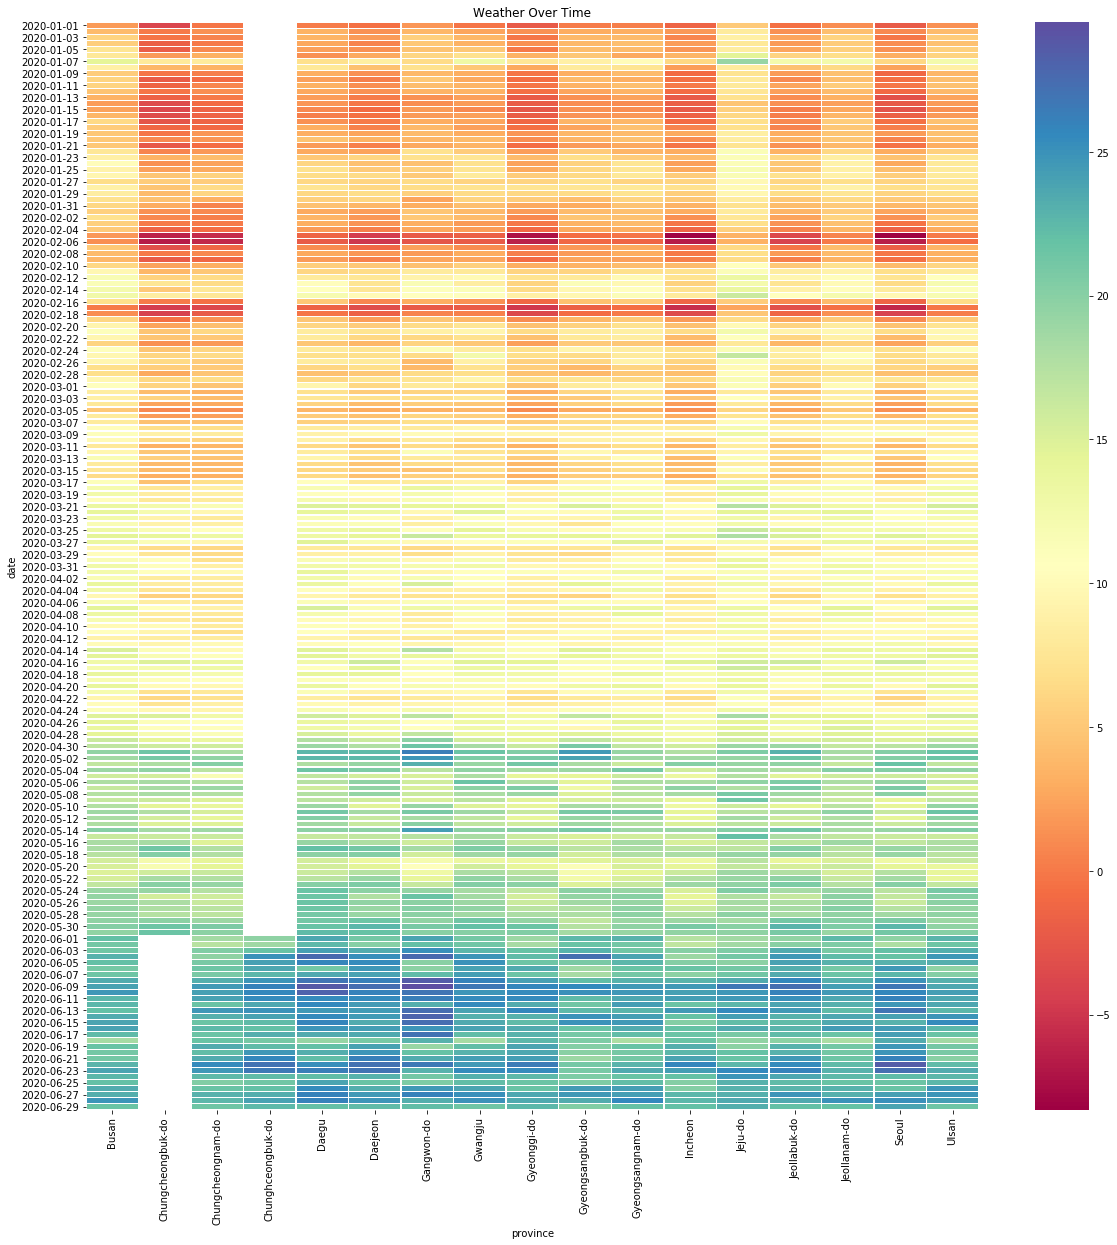

In [28]:
weatherData = pd.read_csv('covid/weather.csv')
weatherData = weatherData.set_index('date')
weatherData = weatherData['2020-01-01' : '2020-08-31'].reset_index()
display(weatherData.head())

weatherDataForHeatmap = weatherData.pivot("date", "province", "avg_temp")
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(weatherDataForHeatmap, cmap="Spectral", annot=False, fmt="d", linewidths=.5, ax=ax).set_title('Weather Over Time')

# Region

In [29]:
regionData = pd.read_csv('covid/region.csv')
pd.set_option('display.max_rows', regionData.shape[0]+1)
display(regionData.head())

fig = px.scatter_mapbox(
    regionData[regionData.city != 'Korea'], 
    text="city",
    lat="latitude", 
    lon="longitude",     
    color="elderly_population_ratio", 
    size="nursing_home_count",
    color_continuous_scale=px.colors.diverging.Spectral, 
    size_max=100, 
    zoom=6,
    title="Number of nusing home and elder population ratio across Korea")
fig.show()

code province         city   latitude   longitude  \
0  10000    Seoul        Seoul  37.566953  126.977977   
1  10010    Seoul   Gangnam-gu  37.518421  127.047222   
2  10020    Seoul  Gangdong-gu  37.530492  127.123837   
3  10030    Seoul   Gangbuk-gu  37.639938  127.025508   
4  10040    Seoul   Gangseo-gu  37.551166  126.849506   

   elementary_school_count  kindergarten_count  university_count  \
0                      607                 830                48   
1                       33                  38                 0   
2                       27                  32                 0   
3                       14                  21                 0   
4                       36                  56                 1   

   academy_ratio  elderly_population_ratio  elderly_alone_ratio  \
0           1.44                     15.38                  5.8   
1           4.18                     13.17                  4.3   
2           1.54                     14.55                  5.4   
3           0.67                     19.49                  8.5   
4           1.17                     14.39                  5.7   

   nursing_home_count  
0               22739  
1                3088  
2                1023  
3                 628  
4                1080


# Summarise Key findings from Exploratory Data Analysis

## Overall Cases in Korea
- On average, there are 100 COVID-19 cases in infected city. 
- The numbers are highly skewed by Nam-gu, a province of Daegu. Nam-gu has about 4500 cases.
- Most of the clusters are in the province of Daegu, Gyeonggi-do and Seoul

### Cases across various Korea province
- Majority of the province has more individual cases of COVID-19 than group cases with the exception of Incheon and Ulsan
- Seoul, Daegu, Gyeonggi-do and Gyeongsangbuk-do has the most number of individual cases among the Korea provinces, number of cases range from 150 to 200 with the exception of Daegu
- In addition, the same group of provinces has the most number of grouped cases, number of cases range from 50-100 with the exception of Daegu

### Source of infection
- Sources of infection mainly come from Shincheonji Church, Itawon Clubs, Contact with Patients and Overseas inflow
- Most of the infection sources across various province has less than 500 cases with the exception of Daegu. 
- Daegu has more than 4000 cases from Shincheonji Church and about 2000 cases from contact with patient and other cases each.

## Patient Cases
- There is a quick spike in daily COVID-19 cases from Feb to Mar before slowing dripping down to single digit in May. There are double digit COVID-19 cases in June 

### Recovery Speed
- Age has an R-squared value of 0.04 for male and 0.03 for female against total treatment days.
- At first graze, age seems to have little to no effect on recovery speed. 
- However when we used the mean recovery days for each age group, it was found that younger people recovered fast from COVID-19 as compared to older people.
- Average days to recover for young people (<=30) is around 25 days and below. Middle-aged people(30-60) took about 25-30 days to recover. Older people (>=70) took about 32-36 days to recover
- Interestingly, infected people in Daegu only conist of people from 50s to 70s. In addition, it took less than 15 days to recover. People in Jeollabuk-do take longer to recover from COVID-19 as compared to the rest of the provinces. Majority of the people took about 20-25 days to recover.


### Fatality Speed
- The average number of treatment day a patient had before he/she passed away is shorter than the average day it took for a patient recover.
- In addition, younger patient has a lower number of treatment days as compared to older patients. This might indicate that younger patient seek treatment at the later stage of COVID-19.
- Coincidentally, the number of treatment days increased as the age increases. The trend is similar to the recovery speed among during age group.
- Daegu has the fastest fatality speed. An average patient is under treatment for less than 10 days before he/she passed away
- Gyeonggi-do has an outliner. A 30s year old patient died in last than 10 days after seeking treatment.

### Percentage of patients recovered, under treatment and deceased
- Daegu has the highest fatality amount all the provinces. It has a fatality rate of more than 10%. In addition, Daejeon, Gyeongsangbuk-do and Ulsan are the only provinces which have fatailty.
- Male has a higher fatality rate and a lowest survival rate as compared to female

### COVID-19 Tranmission Amount
- Majority of the cases only spread to 1 other person. 
- Cases #20000000205 is a super spread who spreaded to more than 50 people. 
- In addition, there are less than 10 cases where patient spread to more than 30 people or more. 

## Policy
- There is a quick spike in daily COVID-19 cases from Feb to Mar before slowing dripping down to single digit in May. There are double digit COVID-19 cases in June
- Technology related policy are introduced in Feb, especially thanks to policy like open data, people like us are able to do analysis on Korea COVID-19 cases.
- After the spike in COVID-19 cases in March, education, social, health and immigration policy are introduced rapidly. Furthermore, the alert level was upgraded to Level 4 red. 
- After the introduction of the policies, the number of COVID-19 cases dropped drastically during April and May. Hence the policies are effective.
- However, it seems to be lax in control of COVID-19 cases as the COVID-19 slowly creep up to double digit in May/June. This forced the govtnment to introduced administrative policies such as closure of clubs to control the situation.

## Cases Over Time Analysis
- As for 31st Jun 2020, 1.27 million of people has gone for testing, 1.24 million are tested negative, 12.8 thousand of confirmed cases, 11.5 thousand of released cases and 282 people has passed away.  
- Majority of the people are tested negative for covid-19 and less than 1% are tested positive for the virus.
- Among those who are tested positive, almost 90% of the people has recovered and about 2% of the people has passed away

## Cases Over Age & Time Analysis 
- Age group in the 20s 40s 50s 60s has higher infection cases as compared to other age group. 
- Furthermore, in the deceased section, most of the fatalities are in the age group of 60s 70s 80s, 
- This indicate that the risk of death from COVID-19 increases with age. 

## Cases Over Gender & Time Analysis
- There are more female infected cases as compared to male cases. 
- The rate of increases of confirmed cases are about the same for both gender over the last 6 months
- On the other hand, male are more prone to death to COVID-19 as compared to female

## Cases Over Province & Time Analysis
- The province of Daegu, Gyeongsangbuk-do, Incheon and Seoul has the most amount of covid-19 infection cases among the 17 provinces; with Daegu accounting for more than half of the cases.
- The fatality count is relatively proportional to the infection count with the except of Seoul
- Bother Seoul and Gyeonggi-do has about 900 infected cases. However, Gyeonggi-do has about 22 fatalities and Seoul has about 7 fatalities. 

## Weather
- The weather is about the same across the provinces. 
- The temperature gradually increases from around 5 degree to 25 degree for the period of Jan 2020 to June 2020
- The weather is relatively the same across all provinces, it has little to do with the reported cases in the short term

## Number of nursing home vs Population Ratio
- We observed an interesting fact regarding the elderly population ratio and the number of nursing home in the city. 
- The elderly population ratio and the number of nursing home has an inverse relationship 
- Perhaps the absolute number of the elder people is smaller where elderly population ratio are high which explains why there is nursing home in places with higher elderly population ratio.

# Preparing the data for modelling 

We will create a model which will predict whether a COVID-19 patient will survive given a certain set of conditions

- Sort city & province into different risk level according to number of confirmed cases (Low, Medium, High)
- Sort age into different age level according to age (kid, adult, elderly)
- Gender into categorical group of 0 & 1
- Number of treatment day 
- Status of released, deceased into different category (We will ignore cases who are under treatment)

## Get the necessary columns

In [30]:
patientData = pd.read_csv('covid/patientinfo.csv')
patientModellingData = patientData[['sex','age','province','confirmed_date','released_date','deceased_date','state']]

## We removed isolated patient since it is not confirmed if they survived or not
patientModellingData = patientModellingData[patientModellingData['state'] != 'isolated']
nullList = ['sex','age','confirmed_date']
for item in nullList:
     patientModellingData = patientModellingData[~patientModellingData[item].isnull()]
        
display(patientModellingData.head())

sex  age province confirmed_date released_date deceased_date     state
0    male  50s    Seoul     2020-01-23    2020-02-05           NaN  released
1    male  30s    Seoul     2020-01-30    2020-03-02           NaN  released
2    male  50s    Seoul     2020-01-30    2020-02-19           NaN  released
3    male  20s    Seoul     2020-01-30    2020-02-15           NaN  released
4  female  20s    Seoul     2020-01-31    2020-02-24           NaN  released

## Calculate number of days of treatment before dropped date column

In [31]:
cols = ['released_date', 'deceased_date', 'confirmed_date']
patientModellingData[cols] = patientModellingData[cols].apply(pd.to_datetime, errors='coerce', axis=1)

def calculate_number_of_treatment_days(row):
    if row["released_date"] is not pd.NaT:
        treatmentDays = pd.to_numeric((row['released_date'] - row['confirmed_date']).days)
        return(treatmentDays)
    elif row["deceased_date"] is not pd.NaT:
        treatmentDays = pd.to_numeric((row['deceased_date'] - row['confirmed_date']).days)
        return(treatmentDays)
    else:
        return None

patientModellingData['Treatment Days'] = patientModellingData.apply(calculate_number_of_treatment_days, axis=1)

patientModellingData = patientModellingData[~patientModellingData['Treatment Days'].isnull()]
patientModellingDataTreatment = patientModellingData[['sex','age','province','state','Treatment Days']]
display(patientModellingDataTreatment.head())

sex  age province     state  Treatment Days
0    male  50s    Seoul  released            13.0
1    male  30s    Seoul  released            32.0
2    male  50s    Seoul  released            20.0
3    male  20s    Seoul  released            16.0
4  female  20s    Seoul  released            24.0

## Convert state, gender and gender columns to categorical data

In [32]:
genders = {"male": 0, "female": 1}
patientModellingDataTreatment['sex'] = patientModellingDataTreatment['sex'].map(genders)
display(patientModellingDataTreatment.head())

sex  age province     state  Treatment Days
0    0  50s    Seoul  released            13.0
1    0  30s    Seoul  released            32.0
2    0  50s    Seoul  released            20.0
3    0  20s    Seoul  released            16.0
4    1  20s    Seoul  released            24.0

In [33]:
state = {"released": 0, "deceased": 1}
patientModellingDataTreatment['state'] = patientModellingDataTreatment['state'].map(state)
display(patientModellingDataTreatment.head())

sex  age province  state  Treatment Days
0    0  50s    Seoul      0            13.0
1    0  30s    Seoul      0            32.0
2    0  50s    Seoul      0            20.0
3    0  20s    Seoul      0            16.0
4    1  20s    Seoul      0            24.0

In [34]:
age = {'0s':0, '10s':1, '20s':2, '30s':3, '40s':4, '50s':5, '60s':6, '70s':7, '80s':8, '90s':9}
patientModellingDataTreatment['age'] = patientModellingDataTreatment['age'].map(age)
display(patientModellingDataTreatment.head())

sex  age province  state  Treatment Days
0    0  5.0    Seoul      0            13.0
1    0  3.0    Seoul      0            32.0
2    0  5.0    Seoul      0            20.0
3    0  2.0    Seoul      0            16.0
4    1  2.0    Seoul      0            24.0

## Determine the risk level for each province

In [35]:
caseData = pd.read_csv('covid/case.csv')
caseDataForMap = caseData.copy()
sortedValues = caseDataForMap.groupby('province').sum().sort_values(by=['confirmed'], ascending=False).reset_index()
sortedValues = sortedValues[['province','confirmed']]
display(sortedValues.head())

province  confirmed
0             Daegu       6680
1  Gyeongsangbuk-do       1324
2             Seoul       1280
3       Gyeonggi-do       1000
4           Incheon        202

In [36]:
print('Mean: ', sortedValues.mean().values)
print('Standard Derivation: ', sortedValues.std().values)

Mean:  [670.29411765]
Standard Derivation:  [1610.8280776]


This amount of COVID-19 cases has a mean of 670 and a standard deviation of 1610.

Hence we sort the provinces into 4 different types of level:
- Very Risk = 4 (Above 2000 cases)
- High Risk = 3 (1000 - 2000 cases)
- Medium Risk = 2 (100 - 999 cases)
- Low Risk = 1 ( Below 99 cases)

In [37]:
def calculate_risk_level(sortedValues) :
    if sortedValues['confirmed'] >= 2000:
        return 4
    elif sortedValues['confirmed'] >= 1000 and sortedValues['confirmed'] < 2000:
        return 3
    elif sortedValues['confirmed'] >= 100 and sortedValues['confirmed'] < 900:
        return 2
    else:
        return 1

In [38]:
sortedValues['Risk Level'] = sortedValues.apply(calculate_risk_level,axis=1);
sortedValues = sortedValues[['province','Risk Level']]
display(sortedValues.head())

province  Risk Level
0             Daegu           4
1  Gyeongsangbuk-do           3
2             Seoul           3
3       Gyeonggi-do           3
4           Incheon           2

In [39]:
dataForModelling = patientModellingDataTreatment.merge(sortedValues, on='province', how='left')
dataForModelling = dataForModelling[['sex','age','state','Treatment Days','Risk Level']]
display(dataForModelling.head())

sex  age  state  Treatment Days  Risk Level
0    0  5.0      0            13.0           3
1    0  3.0      0            32.0           3
2    0  5.0      0            20.0           3
3    0  2.0      0            16.0           3
4    1  2.0      0            24.0           3

# Correlation Matrix

sex               1635
age               1634
state             1635
Treatment Days    1635
Risk Level        1635
dtype: int64

True
False


sex               1634
age               1634
state             1634
Treatment Days    1634
Risk Level        1634
dtype: int64

False
True


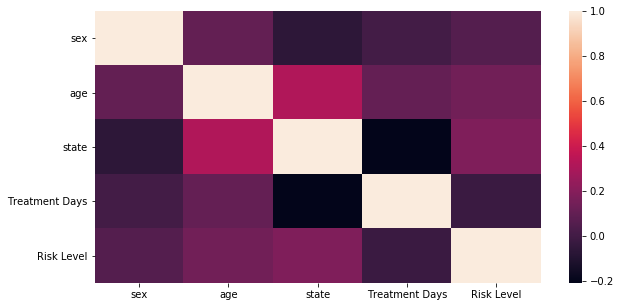

In [40]:
plt.figure(figsize=(10,5))
sns.heatmap(dataForModelling.corr())

dataForModelling['age'] = pd.to_numeric(dataForModelling['age'])

dataForModellingForCleaning = dataForModelling.copy()

display(dataForModellingForCleaning.count())
print(np.any(np.isnan(dataForModellingForCleaning)))
print(np.all(np.isfinite(dataForModellingForCleaning)))

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(dataForModellingForCleaning)
display(dataForModellingForCleaning.count())
print(np.any(np.isnan(dataForModellingForCleaning)))
print(np.all(np.isfinite(dataForModellingForCleaning)))

# Building Machine Learning Models Part 1

In [41]:
x = dataForModellingForCleaning.drop("state", axis=1)
y = dataForModellingForCleaning["state"]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## Stochastic Gradient Descent (SGD):

In [42]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

## Random Forest:

In [43]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

## Logistic Regression:

In [44]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

## Gaussian Naive Bayes:

In [45]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

## K Nearest Neighbor:

In [46]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

## Perceptron:

In [47]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

## Linear Support Vector Machine:

In [48]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

## Decision Tree

In [49]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

## Getting the best model

In [50]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

Model
Score                            
99.54               Random Forest
99.54               Decision Tree
98.35                         KNN
97.99     Support Vector Machines
97.90         Logistic Regression
97.71                  Perceptron
97.53                 Naive Bayes
96.53  Stochastic Gradient Decent

## Decision Tree Diagram

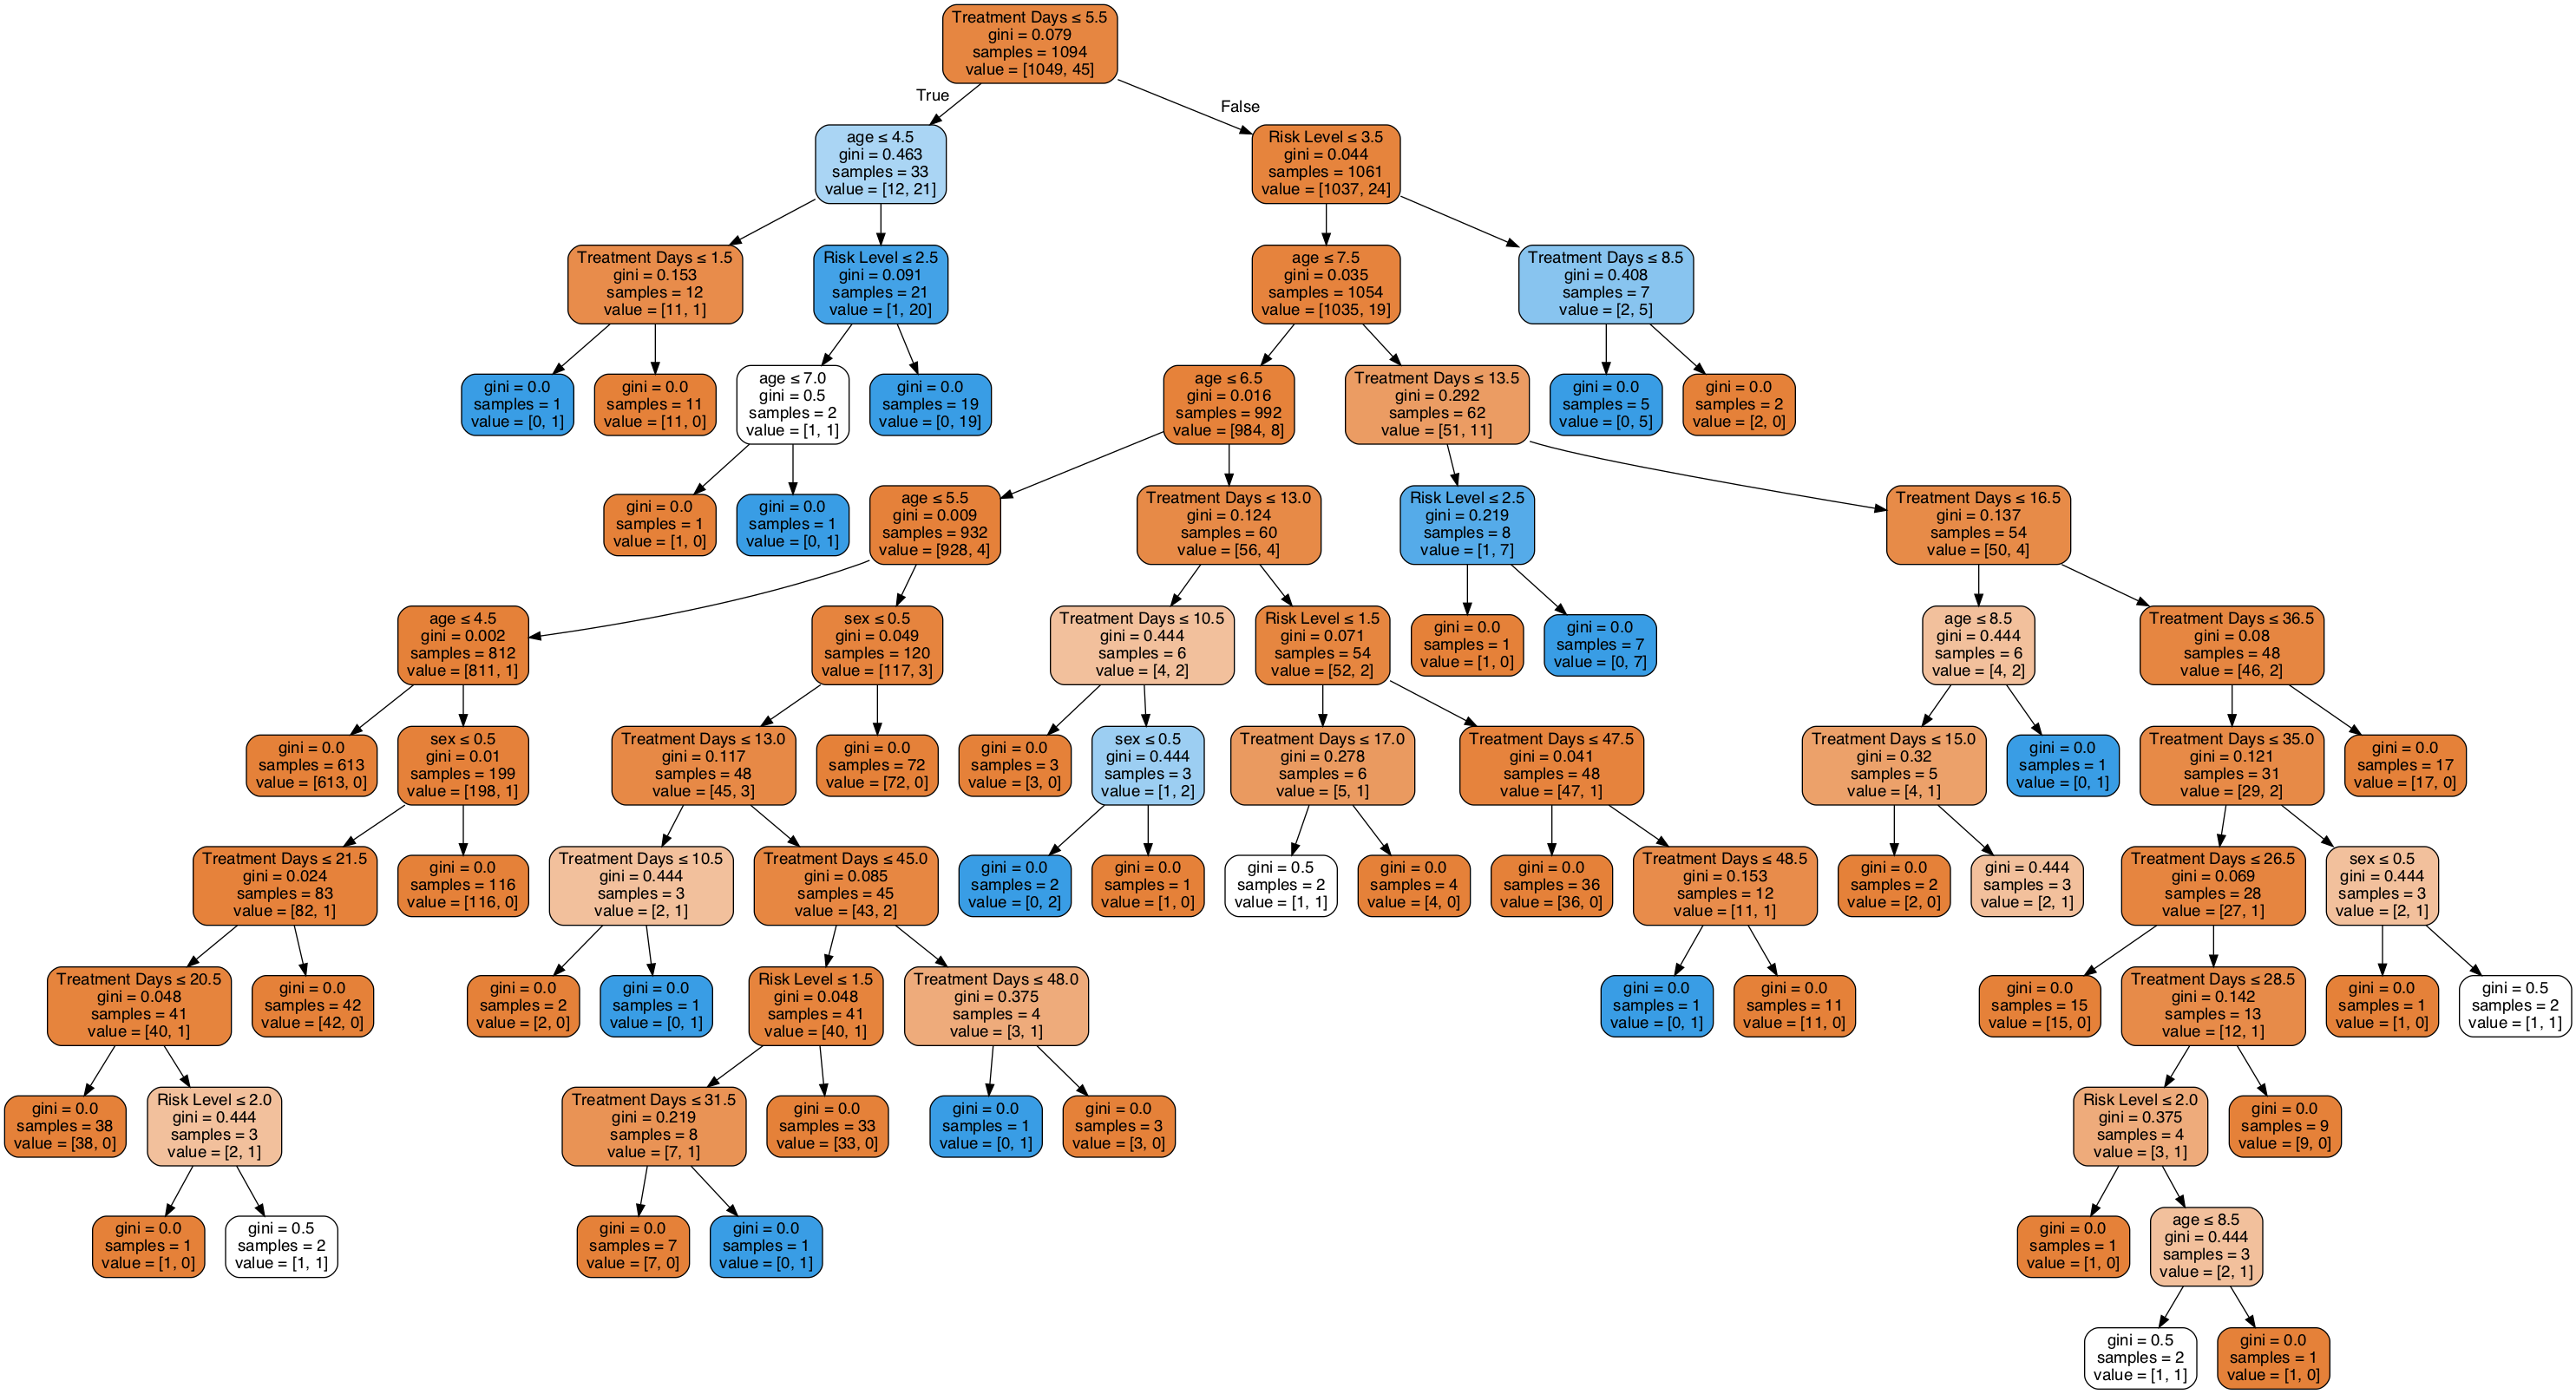

In [51]:
feature_cols = x.columns

dot_data = StringIO()
export_graphviz(decision_tree, out_file = dot_data, 
                      feature_names = feature_cols,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('covidTree.png')
Image(graph.create_png())

# Entropy 0 == no disorder // perfect knowledge, perfect classification

## What is the most important feature ?

In [52]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

importance
feature                   
Treatment Days       0.591
age                  0.221
Risk Level           0.164
sex                  0.024

In [53]:
barData = importances.reset_index()
fig = px.bar(barData, x='feature', y='importance')
fig.show()

- Surprisingly, our model indicated that the number of treatment days is the most important feature. <br>
- Followed by the age and the location of the person. 
- The least important feature is the gender of the person

## Confusion Matrix

In [54]:
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[1040,    9],
       [  16,   29]])

The first row is about the survived-predictions: 
- 1039 patients were correctly classified as survived (called true positives) 
- and 10 where wrongly classified as survived (false positives).

The second row is about the not-survived-predictions: 
- 16 patients where wrongly classified as not survived (false negatives) 
- and 29 where correctly classified as not survived (true negatives).

## Precision and Recall:

In [55]:
print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.7631578947368421
Recall: 0.6444444444444445


Our model predicts 73% of the time, a passengers survival correctly (precision). <br> 
The recall tells us that it predicted the survival of 62 % of the people who actually survived.

# Building Machine Learning Models Part 2

Lets observe what happened if we drop the treatment days column
Will the model be more accurate?

In [56]:
x2 = dataForModellingForCleaning.drop(["state","Treatment Days"], axis=1)
y2 = dataForModellingForCleaning["state"]
X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, test_size=0.33, random_state=42)

## Random Forest

In [57]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

## Decision Tree

In [58]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

## Getting the best model

In [59]:
results = pd.DataFrame({
    'Model': ['Random Forest','Decision Tree'],
    'Score': [acc_random_forest, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(2)

Model
Score               
96.89  Random Forest
96.89  Decision Tree

## Decision Tree Diagram

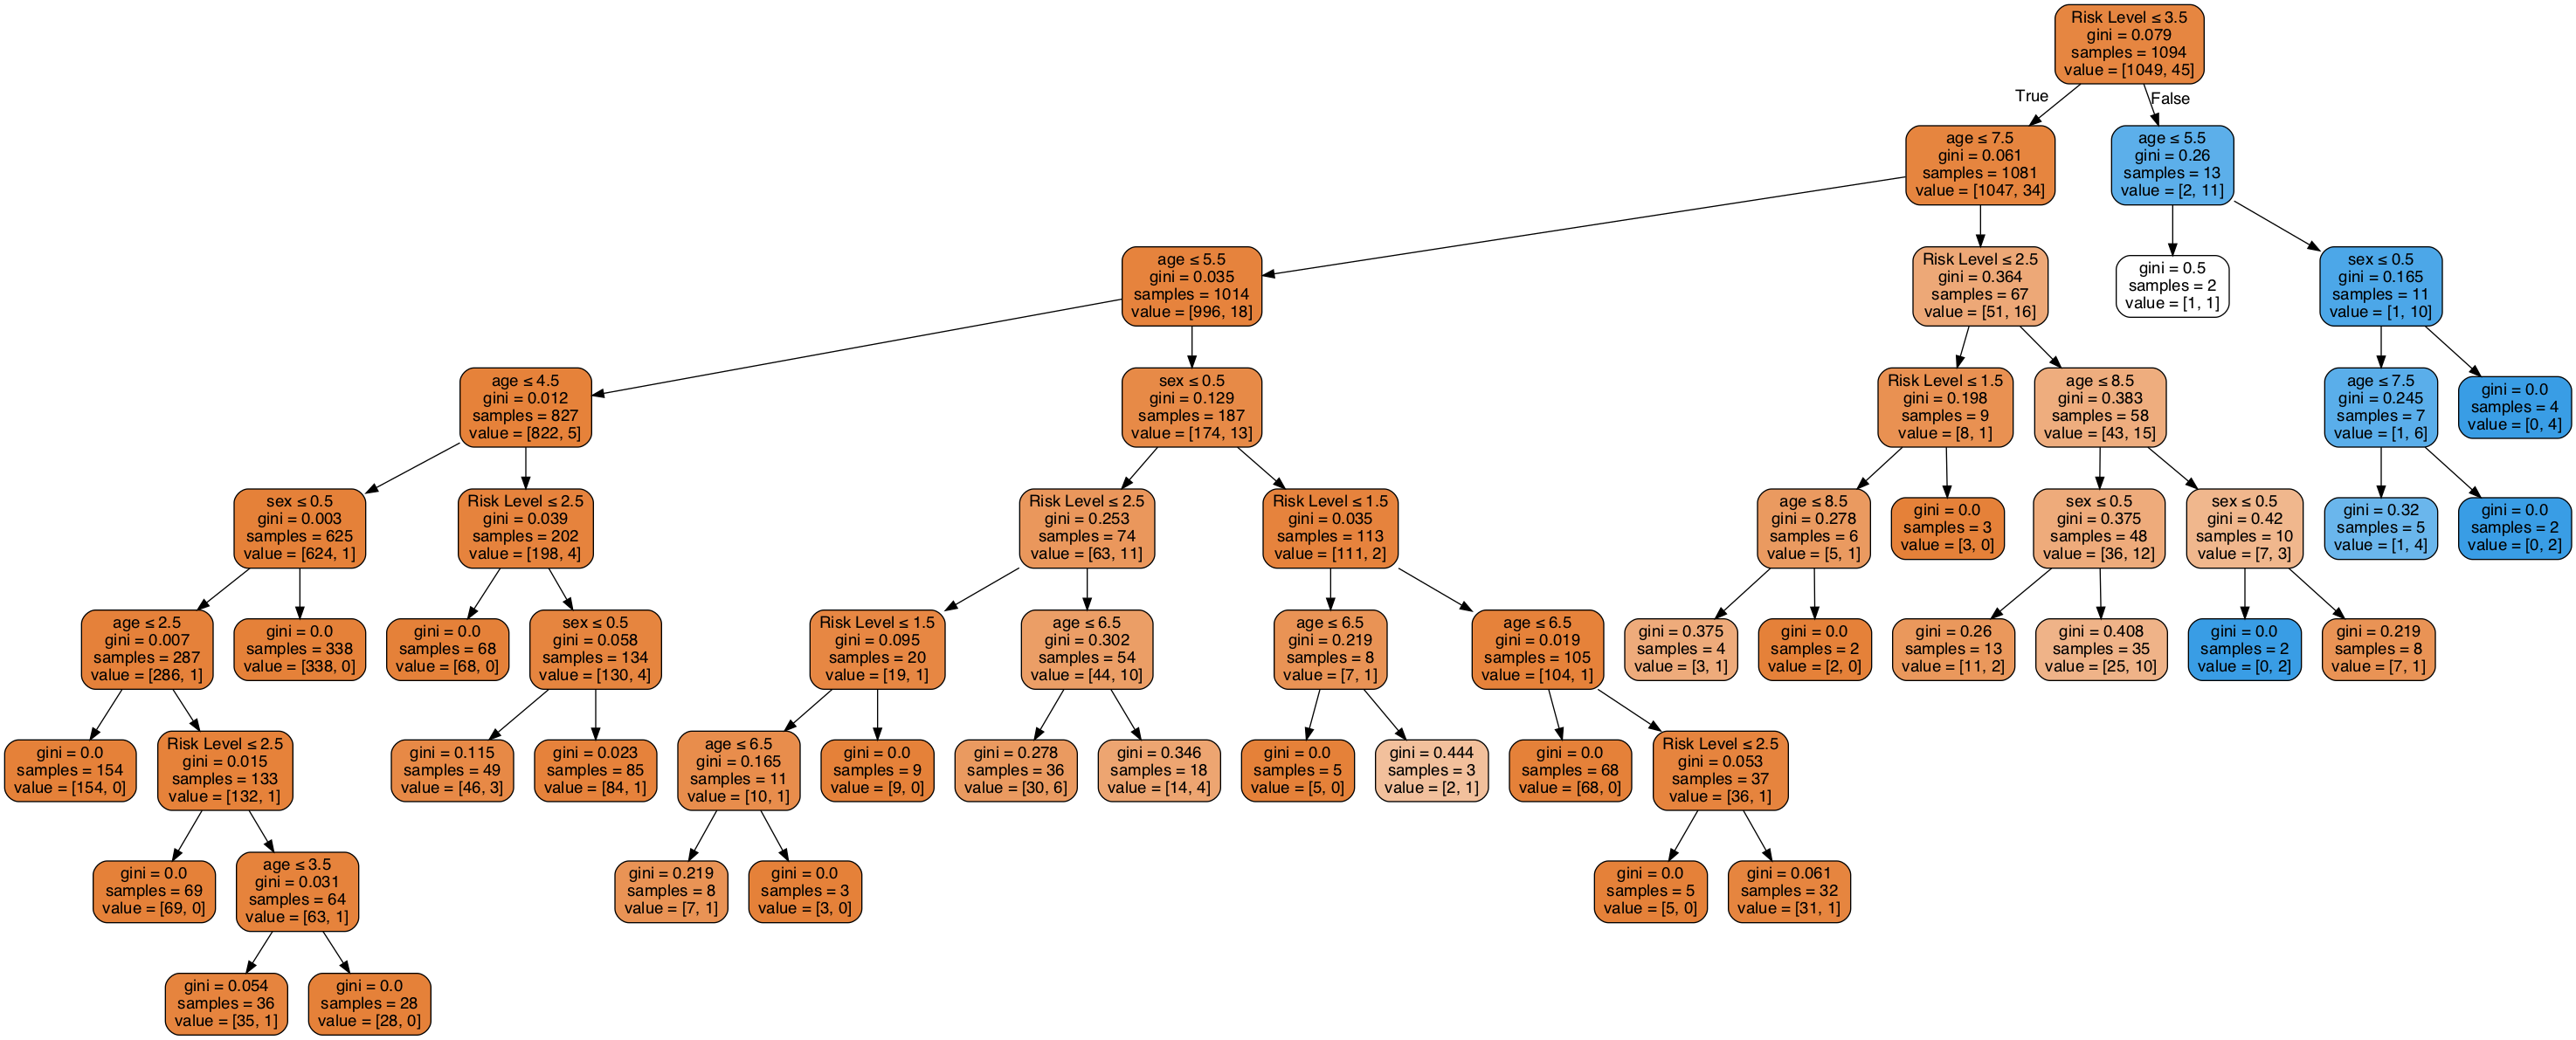

In [60]:
feature_cols = x2.columns

dot_data = StringIO()
export_graphviz(decision_tree, out_file = dot_data, 
                      feature_names = feature_cols,  
                     filled = True, rounded = True,  
                    special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('covidTree2.png')
Image(graph.create_png())

## Importance

In [61]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

importance
feature               
Risk Level       0.510
age              0.441
sex              0.048

In [62]:
barData = importances.reset_index()
fig = px.bar(barData, x='feature', y='importance')
fig.show()

- In this new model, age and risk level plays an equally important role (0.479 vs 0.469)
- Unlike in the older model where age has an importance level of 0.217 and risk level has an importance level of 0.138

## Confusion Matrix

In [63]:
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[1048,    1],
       [  36,    9]])

## Precision and Recall

In [64]:
print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.9
Recall: 0.2


# Summary between the old and new model

## Importance
New
- age	0.479
- Risk Level	0.469
- sex	0.052

Old
- Treatment Days	0.616
- age	0.217
- Risk Level	0.138
- sex	0.029

The location of the patient(Risk Level) plays a greater role in the new model as compared to the old model <br>
The gender of the person has the least impact on whether the patient will survive the infection

## Confusion Matrix
### New Mode: <br>
The first row is about the survived-predictions:
- 1048 passengers were correctly classified as survived (called true positives)
- and 1 where wrongly classified as survived (false positives).

The second row is about the not-survived-predictions:
- 37 passengers where wrongly classified as not survived (false negatives)
- and 8 where correctly classified as not survived (true negatives).

###  Older Model: <br>
The first row is about the survived-predictions:
- 1039 passengers were correctly classified as survived (called true positives)
- and 10 where wrongly classified as survived (false positives).

The second row is about the not-survived-predictions:
- 17 passengers where wrongly classified as not survived (false negatives)
- and 28 where correctly classified as not survived (true negatives).

###  New vs Old
- True Positives: 1048 vs 1039
- False Positives: 1 vs 10
- True Negatives: 8 vs 28
- False Negatives: 37 vs 17

The new model is able to predict whether the patient survive better than the old model. <br>
On the other hand, the old model can predict the patient who does not survive than the new model.

## Precision Recall
New:
- Precision: 0.8888888888888888
- Recall: 0.17777777777777778

Old:
- Precision: 0.7435897435897436
- Recall: 0.6444444444444445

The new model has higher precision rate of 88% as compared to the old model of 74% <br>
However, the old model has a much higher recall rate of 64% as compared to new model of 18%

## Which one is better?
The old model is better than the new model even though it has a lower precision rate.<br>
The number of survivor in COVID-19 is much higher than the number of deceased. <br>
Hence, it is much harder to predict who will pass away from the infection. <br> 

The new model is unable to predict whether a patient will pass away. <br>
The number of false negatives outweigh the number of true negatives.

On the other hand, the old model is able to predict the deceased much accurately than the new model. <br>
With that in mind, this also indicated that the number of days of treatment is vital.

# Step to take to control the COVID-19 situation even better

Generally, those who passed away from the infection had lesser days of treatment. However, is it right for us to conclude that lesser amount of treatment days, the higher the fatality rate? Are the risk of dying higher during first few days/weeks of treatment? Or is there something more to it?

## Abraham Wald and the Missing Bullet Holes

This situation is something similar to Abraham Wald and the Missing Bullet Holes. @penguinpress summed up the situation perfectly:

You don't want your planes to get shot down by enemy fighters, so you armor them. But armor makes the plane heavier, and heavier planes are less maneuverable and use more fuel. Armoring the planes too much is a problem; armoring the planes too little is a problem. Somewhere in between there's an optimum.

When American planes came back from engagements over Europe, they were covered in bullet holes. But the damage wasn't uniformly distributed across the aircraft. There were more bullet holes in the fuselage, not so many in the engines.

![title](stats.png)

At first glance, it seems reasonable to focus the armor on the fuselage. However, the armor, said Wald, doesn't go where the bullet holes are. It goes where the bullet holes aren't: on the engines.

The missing bullet holes were on the missing planes. The reason planes were coming back with fewer hits to the engine is that planes that got hit in the engine weren't coming back.

If you go to the recovery room at the hospital, you'll see a lot more people with bullet holes in their legs than people with bullet holes in their chests. But that's not because people don't get shot in the chest; it's because the people who get shot in the chest don't recover.

The link to the excellent article written by @penguinpress is in the credit section below.

## Survivorship Bias
In this case, our model only consists of people who have passed away after they have gone through treatment. We have excluded people who have died even before they have the opportunity to go through treatment! 

Even after we have excluded those who have not undergo treatment before they passed away, our model indicated that the number of treatment days is the strongest factor among gender, location and age. Treatment days has a whooping percentage of 60% in terms of importance next to age which has a importance of 20%.

## Improving the situation
The chances of survival increases as the number of treatment days increases. Hence, the faster detection rate, the earlier the treatment, the more days and opportunities to treat the infection, the better the chances of survival. The Korea government put a very strong emphasis on COVID-19 detection programme and hence they managed to contain the COVID-19 situation.

Various cities among the world were also in lockdown to prevent the rapid spread of COVID-19. The healthcare system will be overwhelmed if COVID-19 were to spread widely which will cause the death rate to escalate as more people will have lesser opportunity to undergo treatment.

The older the person, the higher the chances of infection and death. Hence it is not advisable for elderly people to roam around unless it is necessary.

In terms of locations, the majority of the cases came from Daegu and the sources of infection is from places such as church and clubs. The higher the amount of contact, the greater the chances of infection. It is advisable for the authority to close such areas until a vaccine for COVID-19 is found. During May to June, there is an increase in COVID-19 cases due to complacency.

https://www.aa.com.tr/en/asia-pacific/s-korea-sees-mass-covid-19-cases-linked-to-night-clubs/1838031

https://www.channelnewsasia.com/news/asia/south-korea-covid-19-church-backlash-13092284

# Bonus: Refine ML Model
Will the model's accuracy improve if we include patient who died without any treatment?


In [65]:
patientData = pd.read_csv('covid/patientinfo.csv')
patientModellingData = patientData[['sex','age','province','confirmed_date','released_date','deceased_date','state']]
deadPatientModellingData = patientData[patientData['state'] == 'deceased']
totalDiedPatient = deadPatientModellingData.count()
display(totalDiedPatient)

display('***********')

pd.set_option('display.max_rows', deadPatientModellingData.shape[0]+1)
totalDiedPaitentWithoutTreatment = deadPatientModellingData[deadPatientModellingData['deceased_date'].isnull() == True].count()
display(totalDiedPaitentWithoutTreatment)

patient_id            78
sex                   75
age                   75
country               78
province              78
city                  59
infection_case        36
infected_by            3
contact_number         7
symptom_onset_date     6
confirmed_date        78
released_date          3
deceased_date         66
state                 78
dtype: int64

'***********'

patient_id            12
sex                    9
age                    9
country               12
province              12
city                  12
infection_case         8
infected_by            2
contact_number         4
symptom_onset_date     4
confirmed_date        12
released_date          1
deceased_date          0
state                 12
dtype: int64

Assuming patient who died without any released_date or deceased_date are those died without any treatment

There are about 12 patient who died without any treatment

In [66]:
str(12/78 * 100) + '%'

'15.384615384615385%'

This accounts for 15% of the total death

## Preparing the data for modelling
We will simply add another line of logic to return treatment days = 0 <br>
if the patient is deceased and both released and deceased date are empty

In [67]:
patientData = pd.read_csv('covid/patientinfo.csv')
patientModellingData = patientData[['sex','age','province','confirmed_date','released_date','deceased_date','state']]

## We removed isolated patient since it is not confirmed if they survived or not
patientModellingData = patientModellingData[patientModellingData['state'] != 'isolated']
nullList = ['sex','age','confirmed_date']
for item in nullList:
     patientModellingData = patientModellingData[~patientModellingData[item].isnull()]
        
display(patientModellingData.head())

sex  age province confirmed_date released_date deceased_date     state
0    male  50s    Seoul     2020-01-23    2020-02-05           NaN  released
1    male  30s    Seoul     2020-01-30    2020-03-02           NaN  released
2    male  50s    Seoul     2020-01-30    2020-02-19           NaN  released
3    male  20s    Seoul     2020-01-30    2020-02-15           NaN  released
4  female  20s    Seoul     2020-01-31    2020-02-24           NaN  released

In [68]:
cols = ['released_date', 'deceased_date', 'confirmed_date']
patientModellingData[cols] = patientModellingData[cols].apply(pd.to_datetime, errors='coerce', axis=1)

def calculate_number_of_treatment_days(row):
    if row["released_date"] is not pd.NaT:
        treatmentDays = pd.to_numeric((row['released_date'] - row['confirmed_date']).days)
        return(treatmentDays)
    elif row["deceased_date"] is not pd.NaT:
        treatmentDays = pd.to_numeric((row['deceased_date'] - row['confirmed_date']).days)
        return(treatmentDays)
    elif row["deceased_date"] is pd.NaT and row["released_date"] is pd.NaT:
        if row["state"] == 'deceased' and row["state"] != 'released':
            return 0
        else:
            return None
    else:
        return None

patientModellingData['Treatment Days'] = patientModellingData.apply(calculate_number_of_treatment_days, axis=1)

patientModellingData = patientModellingData[~patientModellingData['Treatment Days'].isnull()]
patientModellingDataTreatment = patientModellingData[['sex','age','province','state','Treatment Days']]
display(patientModellingDataTreatment.head())

sex  age province     state  Treatment Days
0    male  50s    Seoul  released            13.0
1    male  30s    Seoul  released            32.0
2    male  50s    Seoul  released            20.0
3    male  20s    Seoul  released            16.0
4  female  20s    Seoul  released            24.0

In [69]:
genders = {"male": 0, "female": 1}
patientModellingDataTreatment['sex'] = patientModellingDataTreatment['sex'].map(genders)

state = {"released": 0, "deceased": 1}
patientModellingDataTreatment['state'] = patientModellingDataTreatment['state'].map(state)

age = {'0s':0, '10s':1, '20s':2, '30s':3, '40s':4, '50s':5, '60s':6, '70s':7, '80s':8, '90s':9}
patientModellingDataTreatment['age'] = patientModellingDataTreatment['age'].map(age)

display(patientModellingDataTreatment.head())

sex  age province  state  Treatment Days
0    0  5.0    Seoul      0            13.0
1    0  3.0    Seoul      0            32.0
2    0  5.0    Seoul      0            20.0
3    0  2.0    Seoul      0            16.0
4    1  2.0    Seoul      0            24.0

In [70]:
dataForModelling = patientModellingDataTreatment.merge(sortedValues, on='province', how='left')
dataForModelling = dataForModelling[['sex','age','state','Treatment Days','Risk Level']]
display(dataForModelling.head())

sex  age  state  Treatment Days  Risk Level
0    0  5.0      0            13.0           3
1    0  3.0      0            32.0           3
2    0  5.0      0            20.0           3
3    0  2.0      0            16.0           3
4    1  2.0      0            24.0           3

## Building Machine Learning Models Part 3

In [71]:
clean_dataset(dataForModelling)
display(dataForModelling.count())
print(np.any(np.isnan(dataForModelling)))
print(np.all(np.isfinite(dataForModelling)))

x3 = dataForModelling.drop(["state"], axis=1)
y3 = dataForModelling["state"]
X_train, X_test, Y_train, Y_test = train_test_split(x3, y3, test_size=0.33, random_state=42)

## Random_forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

## Decision Tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

results = pd.DataFrame({
    'Model': ['Random Forest','Decision Tree'],
    'Score': [acc_random_forest, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(2)

sex               1642
age               1642
state             1642
Treatment Days    1642
Risk Level        1642
dtype: int64

False
True


Model
Score               
99.64  Random Forest
99.64  Decision Tree

## Importances

In [72]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

importance
feature                   
Treatment Days       0.610
age                  0.204
Risk Level           0.156
sex                  0.030

## Confusion Matrix

In [73]:
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[1039,   10],
       [  14,   37]])

## Precision & Recall

In [74]:
print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.7872340425531915
Recall: 0.7254901960784313


## Final Summary

Model with treatment day and those without treatment:
- Precision: 0.74
- Recall: 0.7254901960784313

Model without treatment day:
- Precision: 0.8888888888888888
- Recall: 0.17777777777777778

Model with treatment day :
- Precision: 0.7435897435897436
- Recall: 0.6444444444444445

Recall increases by around 8% by including those without treatment <br>
while precision remains about the same.

# Bonus 2: Time Series World Map Visualisation of COVID-19 cases in korea 


In [3]:
timeProvince = pd.read_csv('covid/timeprovince.csv')
display(timeProvince.head())

date  time province  confirmed  released  deceased
0  2020-01-20    16    Seoul          0         0         0
1  2020-01-20    16    Busan          0         0         0
2  2020-01-20    16    Daegu          0         0         0
3  2020-01-20    16  Incheon          1         0         0
4  2020-01-20    16  Gwangju          0         0         0

In [4]:
data = {'province': ['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'], 
        'longitude': [127.047325,129.066666,128.600006,126.705208,126.916664,127.385002,
                     129.316666,127.2822,127.143738,127.920158,
                     127.935905,126.979874,126.916664,126.9910,
                      129.263885,128.429581,126.5312],
        'latitude': [37.517235,35.166668,35.866669,37.456257,35.166668,36.351002,
                    35.549999,36.4870,37.603405,37.342220,
                    36.981304,36.806702,35.166668,34.8679,
                     35.835354,34.855228,33.4996]}
location = pd.DataFrame(data=data)
location.head()

province   longitude   latitude
0    Seoul  127.047325  37.517235
1    Busan  129.066666  35.166668
2    Daegu  128.600006  35.866669
3  Incheon  126.705208  37.456257
4  Gwangju  126.916664  35.166668

In [6]:
mergedData = timeProvince.merge(location, on='province', how='left')
mergedData.head()

date  time province  confirmed  released  deceased   longitude  \
0  2020-01-20    16    Seoul          0         0         0  127.047325   
1  2020-01-20    16    Busan          0         0         0  129.066666   
2  2020-01-20    16    Daegu          0         0         0  128.600006   
3  2020-01-20    16  Incheon          1         0         0  126.705208   
4  2020-01-20    16  Gwangju          0         0         0  126.916664   

    latitude  
0  37.517235  
1  35.166668  
2  35.866669  
3  37.456257  
4  35.166668

In [11]:
mergedData = mergedData.dropna()

In [17]:
fig = px.scatter_mapbox(
    mergedData, lat="latitude", lon="longitude",
    size="confirmed", size_max=100,
    color="deceased", color_continuous_scale=px.colors.diverging.Spectral,
    hover_name="province",           
    mapbox_style='dark', zoom=6,
    animation_frame="date", animation_group="province"
)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 200
fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 200
fig.layout.coloraxis.showscale = False
fig.layout.sliders[0].pad.t = 10
fig.layout.updatemenus[0].pad.t= 10

fig.show()

### Credit

Network Diagram: <br> 
https://medium.com/@anand0427/network-graph-with-at-t-data-using-plotly-a319f9898a02\n 

Machine Learning: <br> 
https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8\n 

Abraham Wald and the Missing Bullet Holes: <br> 
https://medium.com/@penguinpress/an-excerpt-from-how-not-to-be-wrong-by-jordan-ellenberg-664e708cfc3d\n 

Time Series World Map <br> 
https://datacrayon.com/posts/statistics/data-is-beautiful/coronavirus-time-series-map-animation/\n 

Decision Tree Diagram: <br> 
Ze Yu's sample project